In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
df = pd.read_csv('/Users/chirag/Desktop/DataTalks/Module2/data/hw1_data.csv')

In [117]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Basic EDA

In [118]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [119]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [120]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<Axes: >

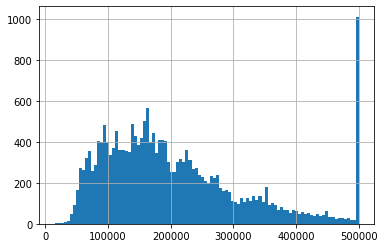

In [121]:
df.median_house_value.hist(bins=100)

<Axes: >

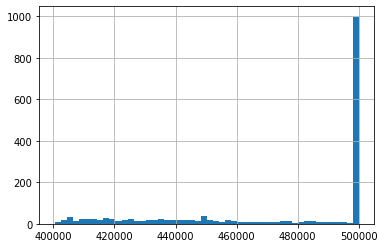

In [122]:
df.median_house_value[df.median_house_value > 400000].hist(bins=50)

### Yes, median_house_value has long tail

In [123]:
'''keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'''

df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [124]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [125]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [126]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Answer 1: total_bedrooms has empty values

In [127]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

## Answer 2: median (50% percentile) for variable 'population' is 1195

## Data Prep -> Data Split + log transformation on median_house_value  use np.log1p this adds 1 to the number to make sure we do not get an error, as log of 0 is undefined

In [128]:
'''Splitting the data into train, test and validation sets, with 60%, 20% and 20% of the data respectively, using the random_state=42'''

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size=0.25, random_state=42)

train.shape, test.shape, val.shape

((9411, 9), (3138, 9), (3138, 9))

In [129]:
df.shape

(15687, 9)

In [130]:
(train.shape[0] / df.shape[0]) , (test.shape[0] / df.shape[0]) , (val.shape[0] / df.shape[0])

(0.5999235035379614, 0.20003824823101932, 0.20003824823101932)

In [131]:
'''Applying log transformation to the median_house_value column in train, test and validation sets'''

train['median_house_value'] = np.log1p(train['median_house_value'])

test['median_house_value'] = np.log1p(test['median_house_value'])

val['median_house_value'] = np.log1p(val['median_house_value'])

In [132]:
'''Storing the median_house_value column from train, test and validation sets in separate variables'''

y_train = train['median_house_value']

y_test = test['median_house_value']

y_val = val['median_house_value']

'''Dropping the median_house_value column from train, test and validation sets'''

train.drop('median_house_value', axis=1, inplace=True)

test.drop('median_house_value', axis=1, inplace=True)

val.drop('median_house_value', axis=1, inplace=True)

## Q3 Option A: Fill the missing values with 0

In [133]:
def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values
    return X

### Linear Regression 

In [134]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [135]:
### Data Preparation
X_train = prepare_X_0(train)

### Finding the optimal weights i.e. Training the model
w_0, w = train_linear_regression(X_train, y_train)

In [136]:
### Predicting the median_house_value for train set
y_pred = w_0 + X_train.dot(w)

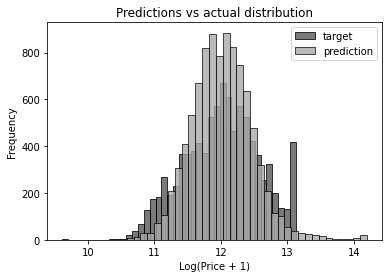

In [137]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [138]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [139]:
'''Calculating the RMSE for the train set'''

round(rmse(y_train, y_pred),2)

0.34

In [140]:
'''Calculating the RMSE for the validation set'''
### Data Preparation
X_val = prepare_X_0(val)

### Predicting the median_house_value for validation set using the weight we got from the train set
y_pred = w_0 + X_val.dot(w)

### Calculating the RMSE for the validation set
round(rmse(y_val, y_pred),2)


0.34

#### We can see the RMSE is pretty low and close for both Train and Validation set

## Q3 Option B: Fill the missing values with the mean of the variable (using only the training data) thus when we prepare val data set too we will use train mean values

In [141]:
def prepare_X_mean(df):
    df = df.fillna(np.mean(train.total_bedrooms))
    X = df.values
    return X

### Linear Regression 

In [142]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [143]:
### Data Preparation
X_train = prepare_X_mean(train)

### Finding the optimal weights i.e. Training the model
w_0, w = train_linear_regression(X_train, y_train)

In [144]:
### Predicting the median_house_value for train set
y_pred = w_0 + X_train.dot(w)

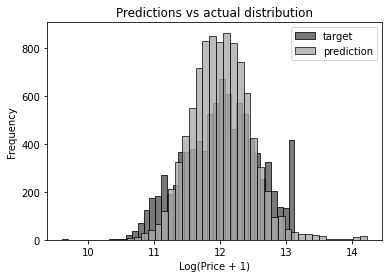

In [145]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [146]:
'''Calculating the RMSE for the train set'''

round(rmse(y_train, y_pred),2)

0.34

In [147]:
'''Calculating the RMSE for the validation set'''
### Data Preparation
X_val = prepare_X_mean(val)

### Predicting the median_house_value for validation set using the weight we got from the train set
y_pred = w_0 + X_val.dot(w)

### Calculating the RMSE for the validation set
round(rmse(y_val, y_pred),2)


0.33

#### We can see the RMSE is pretty low and close for both Train and Validation set


## CONCLUSION: Both the approaches are equally good

## Question 4: Training a Regularized LR with filling the NAs with 0

In [148]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

### Linear Regression 

In [158]:
def train_linear_regression_reg(X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [159]:
### Data Preparation
X_train = prepare_X(train)

X_val = prepare_X(val)

In [160]:
### Finding the optimal weights with regulaization i.e. Training the model

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 0.34
 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.34
    10 0.34


### If we look at upto 2 decimal places only, all have same rmse thus the smallest r to choose is 0 itself, but if we go further than 2 decimal places then 0.001 is better

## Question 5

In [167]:
'''Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
'''
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []

for seed in seeds:
    train, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, val = train_test_split(train, test_size=0.25, random_state=seed)

    train['median_house_value'] = np.log1p(train['median_house_value'])
    test['median_house_value'] = np.log1p(test['median_house_value'])
    val['median_house_value'] = np.log1p(val['median_house_value'])
    
    y_train = train['median_house_value']
    y_test = test['median_house_value']
    y_val = val['median_house_value']

    train.drop('median_house_value', axis=1, inplace=True)
    test.drop('median_house_value', axis=1, inplace=True)
    val.drop('median_house_value', axis=1, inplace=True)

    X_train = prepare_X(train)
    X_val = prepare_X(val)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    rmse_scores.append(rmse(y_val, y_pred))

print(np.std(rmse_scores))

0.005657132479692998


## The Value of std of rmse_scores is ~ 0.005

## Question 6

In [171]:
''' Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001
What's the RMSE on the test dataset? '''


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X


def train_linear_regression_reg(X, y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


train, test = train_test_split(df, test_size=0.2, random_state=9)
train, val = train_test_split(train, test_size=0.25, random_state=9)

train['median_house_value'] = np.log1p(train['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])
val['median_house_value'] = np.log1p(val['median_house_value'])
    
y_train = train['median_house_value']
y_test = test['median_house_value']
y_val = val['median_house_value']

train.drop('median_house_value', axis=1, inplace=True)
test.drop('median_house_value', axis=1, inplace=True)
val.drop('median_house_value', axis=1, inplace=True)



In [173]:
X_train = prepare_X(train)
X_val = prepare_X(val)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_val.dot(w)

print(rmse(y_val, y_pred))

0.34508202038506613


In [174]:
'''Now let's train a model with r=0.001 on the entire dataset (train+validation).'''

X_train_full = pd.concat([train, val])
y_train_full = pd.concat([y_train, y_val])

X_train_full = prepare_X(X_train_full)

w_0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

'''What's the RMSE on the test dataset for the model with r=0.001?'''

X_test = prepare_X(test)

y_pred = w_0 + X_test.dot(w)

print(rmse(y_test, y_pred))


0.34680323088389214


### RMSE on the test data set is 0.3468 which is closer to 0.33

#### FIN ####